In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [5]:
class LIF():
    
    def __init__(self, _I, gl, Cm, El , thresh, spike_val):
    
        self.current = _I
        self.conductance = gl
        self.capacitance = Cm
        self.membr_potential = El
        
        self.spiking_threshold = thresh
        self.spikes = 0
        self.spike_value = spike_val
    
    def V_values(self, T, dt, interval): 
        #function for iterating the model and spitting out the change in membrane potential

        #T = total simulation length [s]
        #dt = step size [s]
        #interval = time interval for the applied current-should be between 0 and T/dt
    
        time    =   np.arange(0, T+dt, dt)      # step values [s]
    
        # VOLTAGE
        V       =   np.zeros(len(time))         # array for saving Voltage history
        V[0]    =   self.membr_potential                        # set initial to resting potential
        
        #CURRENT
        I = self.I_values(time,interval)
        
        ######### Simulation
        for i in range(1, len(time)):
            # use "I - V/R = C * dV/dT" to get this equation
            dV =  (I[i] - self.conductance*(V[i-1]-self.membr_potential))/self.capacitance
            V[i] = V[i-1] + dV*dt

            # in case we exceed threshold
            if V[i] > self.spiking_threshold:
                V[i-1] = self.spike_value   # set the last step to spike value
                V[i] = self.membr_potential       # current step is resting membrane potential
                self.spikes += 1     # count spike

        return V
    
    def I_values(self, time, interval): 
        #function calculating the applied current
        
        I = np.zeros(len(time))
        I[interval[0]:interval[1]] = self.current
        return I
    
    def plotting(self, I, V, time):
        ## Plotting
        fig = plt.figure("Leaky Integrate-and-Fire Neuron", figsize=(14, 7))
        ax = fig.add_subplot(111)
        plt.title("Leaky Integrate-and-Fire Neuron Simulation")
        fig.subplots_adjust(left=0.1, bottom=0.32)

        # plot lines
        line = plt.plot(time, V, label="Membrane Potential")[0]
        line2 = plt.plot(time, I, label="Applied Current")[0]
    
        # add legend
        plt.legend(loc="upper right")

        # add axis labels
        plt.ylabel("Potential [V]/ Current [A]")
        plt.xlabel("Time [s]")
        
        return

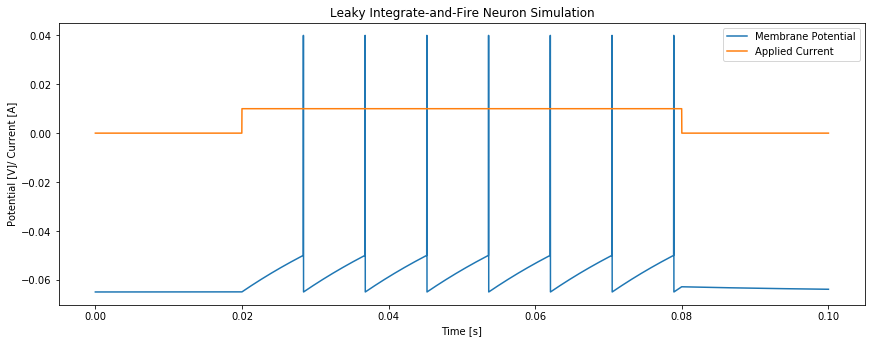

In [3]:
##initial experiment based parameters
I_inital = 0.01
gl_inital = 0.16
Cm_inital = 0.0049

##initalize the LIF class
leaky_IandF_neuron = LIF(_I = I_inital,  # constant applied current 
                         gl = gl_inital, # conductance
                         Cm = Cm_inital, # capacitance
                         El = -0.065,    # membrane potential
                         thresh = -0.05, # spiking threshold
                         spike_val=0.04) # spiking value

##initial time based parameters
T = 0.100
dt = 0.00002
time = np.arange(0, T+dt, dt)
interval = [1000,4000]

##run the simulations
V = leaky_IandF_neuron.V_values(T = T,               # total simulation length          
                                dt = dt,             # step size
                                interval = interval)# list of length 2 indicating the time interval current applied

I = leaky_IandF_neuron.I_values(time, interval)

#plot
leaky_IandF_neuron.plotting(I,V,time)